In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
# Librerías de extracción de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup
import requests
import tqdm
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import datetime

# Requests
import requests

from time import sleep
import random
# Para Importar desde rutas recursivas
# -----------------------------------------------------------------------
import sys
sys.path.append("../") #Para poder importar
from src.SupportAlojamientos import obtain_html,make_df
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns




# Vamos a buscar los apartamentos para todas las fechas de los vuelos

Usando BeautifulSoup y requests, nos vamos a guardar las urls y para que no nos bloqueen, lo guardaremos en un HTML
URLs:

1er Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-10-24&checkout=2024-10-27&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D

2do Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-10-31&checkout=2024-11-03&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D

3er Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-07&checkout=2024-11-10&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D

4to Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-14&checkout=2024-11-17&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D

5to Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-21&checkout=2024-11-24&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D

6to Finde
- https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-28&checkout=2024-12-01&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D



In [14]:
urls_airbnb = ["https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-10-24&checkout=2024-10-27&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D",
               "https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-10-31&checkout=2024-11-03&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D",
               "https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-07&checkout=2024-11-10&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D",
               "https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-14&checkout=2024-11-17&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D",
               "https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-21&checkout=2024-11-24&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D",
               "https://www.airbnb.es/s/Oslo--Noruega/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&monthly_start_date=2024-11-01&monthly_length=3&monthly_end_date=2025-02-01&price_filter_input_type=0&channel=EXPLORE&query=Oslo%2C%20Noruega&date_picker_type=calendar&checkin=2024-11-28&checkout=2024-12-01&adults=4&source=structured_search_input_header&search_type=autocomplete_click&price_filter_num_nights=3&room_types%5B%5D=Entire%20home%2Fapt&amenities%5B%5D=4&amenities%5B%5D=8&place_id=ChIJOfBn8mFuQUYRmh4j019gkn4&location_bb=Qm%2FpgkEvKaJCbz0bQSn2Cw%3D%3D"
               ]

rutas_guardar = ["../datos/html_backups/airbnb_oslo_finde1.html",
                 "../datos/html_backups/airbnb_oslo_finde2.html",
                 "../datos/html_backups/airbnb_oslo_finde3.html",
                 "../datos/html_backups/airbnb_oslo_finde4.html",
                 "../datos/html_backups/airbnb_oslo_finde5.html",
                 "../datos/html_backups/airbnb_oslo_finde6.html"]

# Guardamos los HTML por fin de semana

In [3]:
obtain_html(urls_airbnb,rutas_guardar)

# Los leemos y volvemos soup

In [15]:
finde_soups = {}
# Leer todos los HTML
for i, file_path in enumerate(rutas_guardar, start=1):
    with open(file_path, "r", encoding="utf-8") as file:
        page_content = file.read()
        soup = BeautifulSoup(page_content, "html.parser")
        # Guardar con variables dinamicas
        finde_soups[f'finde{i}'] = soup

finde1 = finde_soups['finde1']
finde2 = finde_soups['finde2']
finde3 = finde_soups['finde3']
finde4 = finde_soups['finde4']
finde5 = finde_soups['finde5']
finde6 = finde_soups['finde6']
findes = [finde1,finde2,finde3,finde4,finde5,finde6]

# Con esta función hacemos el DF

In [16]:
df = make_df(findes)
df.sample(5)

,Título,Descripción,Precio (€),Fecha entrada,Fecha salida
17,Apartamento en Grünerløkka,Apartamento tipo tipo lo en Grünerløkka,1.047,24 oct.,27
117,Apartamento en Bydel Sagene,Apartamento de 3 habitaciones en el centro de ...,404,21 nov.,24
60,Apartamento en Grünerløkka,Apartamento loft extremadamente céntrico,639,7 nov.,10
18,Apartamento en Oslo,Solbakkeveien,389,24 oct.,27
76,Apto. residencial en Grünerløkka,Loft soleado con terraza cerca del centro de l...,"noche,",14 nov.,17


# Ahora arreglamos las fechas y precios

Primero generamos condiciones

In [17]:
cond = df["Fecha entrada"] == "24 oct."
cond2 = df["Fecha entrada"] == "31 oct."
cond3 = df["Fecha entrada"] == "7 nov."
cond4 = df["Fecha entrada"] == "14 nov."
cond5 = df["Fecha entrada"] == "21 nov."
cond6 = df["Fecha entrada"] == "28 nov."

Ahora creamos un DataFrame individual para cada uno

In [18]:
df_finde1 = df[cond]
df_finde2 = df[cond2]
df_finde3 = df[cond3]
df_finde4 = df[cond4]
df_finde5 = df[cond5]
df_finde6 = df[cond6]

Igualamos las filas para arreglar las fechas

In [19]:
df_finde1["Fecha entrada"] = "24/10/2024"
df_finde1["Fecha salida"] = "27/10/2024"
df_finde2["Fecha entrada"] = "31/10/2024"
df_finde2["Fecha salida"] = "3/11/2024"
df_finde3["Fecha entrada"] = "7/11/2024"
df_finde3["Fecha salida"] = "10/11/2024"
df_finde4["Fecha entrada"] = "14/11/2024"
df_finde4["Fecha salida"] = "17/11/2024"
df_finde5["Fecha entrada"] = "21/11/2024"
df_finde5["Fecha salida"] = "24/11/2024"
df_finde6["Fecha entrada"] = "28/11/2024"
df_finde6["Fecha salida"] = "1/12/2024"

Concatenamos todo a un solo DF

In [20]:
df = pd.concat([df_finde1,df_finde2,df_finde3,df_finde4,df_finde5,df_finde6],ignore_index=True)

Limpiamos un poco la tabla y ponemos todo en formato adecuado

In [21]:
df["Precio (€)"] = df["Precio (€)"].str.replace(".","").replace("noche,",np.nan)
df = df.dropna(subset=["Precio (€)"])
df["Fecha entrada"] = pd.to_datetime(df["Fecha entrada"],format="mixed")
df["Fecha salida"] = pd.to_datetime(df["Fecha salida"],format="mixed")
df["Precio (€)"] = df["Precio (€)"].astype(int)
df.head()

,Título,Descripción,Precio (€),Fecha entrada,Fecha salida
1,Apartamento en Gamle Oslo,Apartamento de 3 habitaciones en Ensjø/ Helsfyr,307,2024-10-24,2024-10-27
2,Apartamento en Oslo kommune,"Acogedor, céntrico y habitaciones cuatro",351,2024-10-24,2024-10-27
3,Apartamento en Sentrum,"13,planta Tjuvholmen, gran vista, terraza en l...",549,2024-10-24,2024-10-27
4,Apartamento en Sankt Hanshaugen,Un oasis verde en medio de Oslo,774,2024-10-24,2024-10-27
7,Loft en Ris,"Vinderen, amplio apartamento en el ático",480,2024-10-24,2024-10-27


In [12]:
df.to_csv("../datos/alojamientos_oslo.csv")

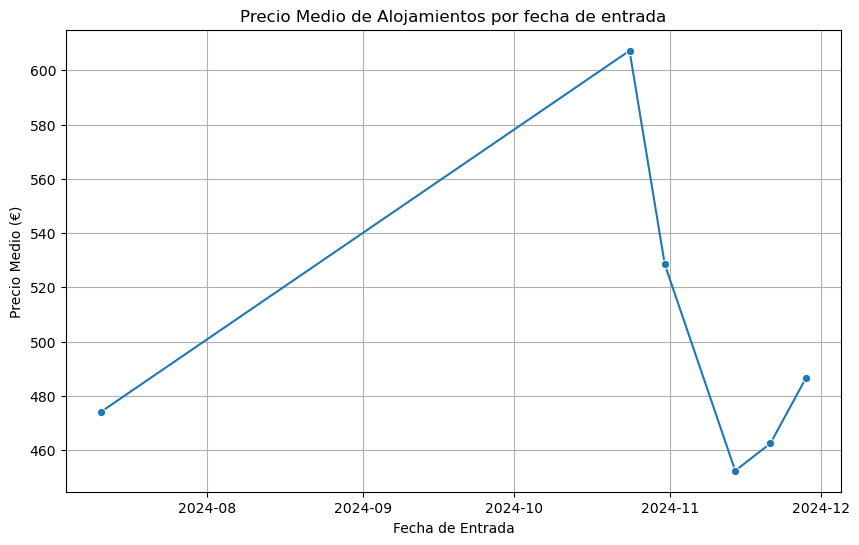

In [22]:
media_precio = df.groupby('Fecha entrada')['Precio (€)'].mean()

# Create the same line plot but using seaborn for a more refined visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x=media_precio.index, y=media_precio.values, marker='o')
plt.title('Precio Medio de Alojamientos por fecha de entrada')
plt.xlabel('Fecha de Entrada')
plt.ylabel('Precio Medio (€)')
plt.grid(True)
plt.show()